In [1]:
# This project is trying to use DT model to predict the win/loss of the NBA game.
# Hence, I might try RF to improve my model to get a better result.

In [2]:
# The dataset I use in this study is extracted from basketball-reference.com. 
# It's the 2018-2019 NBA regular season all teams' Game data.

In [31]:
# Some imports
import pandas as pd
import numpy as np
from six import StringIO
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Read data
df = pd.read_csv('games_18_19.csv')
# Change the dtype
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['Date', 'Start(ET)', 'Visitor Team', 'Visitor Pts', 'Home Team', 'Home Pts','OT', 'Score Type', 'Notes']
df.head() # View the first 5 rows

Date Start(ET)           Visitor Team  Visitor Pts  \
0 2018-10-16     8:00p     Philadelphia 76ers           87   
1 2018-10-16    10:30p  Oklahoma City Thunder          100   
2 2018-10-17     7:00p        Milwaukee Bucks          113   
3 2018-10-17     7:00p          Brooklyn Nets          100   
4 2018-10-17     7:00p      Memphis Grizzlies           83   

               Home Team  Home Pts         OT Score Type Notes  
0         Boston Celtics       105  Box Score        NaN   NaN  
1  Golden State Warriors       108  Box Score        NaN   NaN  
2      Charlotte Hornets       112  Box Score        NaN   NaN  
3        Detroit Pistons       103  Box Score        NaN   NaN  
4         Indiana Pacers       111  Box Score        NaN   NaN

In [89]:
# Create new features to see the times that home teams won more scores
df['Home_Win'] = df['Visitor Pts'] < df['Home Pts']
# Save it as a new label
y_true = df['Home_Win'].values
df['Home_Win'].mean()

0.5907012195121951

In [90]:
from collections import defaultdict

won_last = defaultdict(int)
df['HomeLastWin'] = 0
df['VisitorLastWin'] = 0

# datetime disorder df.sort('Date').iterrows()
for index, row in df.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    df.at[index, 'HomeLastWin'] = won_last[home_team]
    df.at[index, 'VisitorLastWin'] = won_last[visitor_team]
    won_last[home_team] = int(row['Home_Win'])
    won_last[visitor_team] = 1 - int(row['Home_Win'])

team_prewins = df[['HomeLastWin', 'VisitorLastWin']].values
team_prewins.mean()

0.4992378048780488

In [16]:
# Split and train the dataset
X_train, X_test, y_train, y_test = train_test_split(team_prewins, y_true, random_state=42)
# Use DecisionTree model first time to test
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree.score(X_test,y_test)
# The DT Model accuracy is around 56%.

0.5640243902439024

In [17]:
# Use Random Forest model first time to test
X_train, X_test, y_train, y_test = train_test_split(team_prewins, y_true, random_state=60)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
# The RF Model accuracy is roughly 59%.

0.5884146341463414

In [91]:
# Get the last season games dataset
prewin = pd.read_excel('previouswin.xls')
# Add new feature 'ranking level'
df['HomeTeamRanksHigher'] = 0

for index, row in df.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    home_rank = prewin[prewin['Team'] == home_team]['Rk'].values[0]
    visitor_rank = prewin[prewin['Team'] == visitor_team]['Rk'].values[0]
    row['HomeTeamRanksHigher'] = int(home_rank > visitor_rank)
    df.at[index, 'HomeTeamRanksHigher'] = int(home_rank < visitor_rank)
prewin.head()
team_homehigher = df[['HomeLastWin', 'VisitorLastWin', 'HomeTeamRanksHigher']]


In [99]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import re
#pattern = re.compile('<!--[\s\S]*?-->') 
pattern = re.compile('<tbody>[\s\S]*?</tbody>')# html pattern
url = 'https://www.basketball-reference.com/leagues/NBA_2018_standings.html'
html = urlopen(url).read()
bsObj = BeautifulSoup(html,'lxml')
content = bsObj.find(id='all_expanded_standings').prettify()
match = re.search(pattern,content)
str_tbody = match.group()
html_tbody = BeautifulSoup(str_tbody,'lxml')# transform str to html features
list = []
for tr in html_tbody.find_all('tr'):
    rows = [td.text for td in tr.find_all('td')]
    list.append(rows)

# save to csv file
file = 'standing.csv'#save it as csv file to the local folder
df_data = pd.DataFrame(data=list)
df_data.to_csv(file)
print('done')

done


In [104]:
# Get the last season games dataset
prewin = pd.read_csv('standing.csv')
# Declare a list that is to be converted into a column 
Rk = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]# Using 'Rk' as the column name 
prewin['Rk'] = Rk
# Add new feature 'ranking level'
df['HomeTeamRanksHigher'] = 0

for index, row in df.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    home_rank = prewin[pre['0'] == home_team]['Rk'].values[0]
    visitor_rank = prewin[pre['0'] == visitor_team]['Rk'].values[0]
    row['HomeTeamRanksHigher'] = int(home_rank > visitor_rank)
    df.at[index, 'HomeTeamRanksHigher'] = int(home_rank < visitor_rank)
pre.head()


Unnamed: 0                      0      1      2      3      4      5     6  \
0           0        Houston Rockets  65-17   34-7  31-10   24-6  41-11   6-4   
1           1        Toronto Raptors  59-23   34-7  25-16  40-12  19-11  12-4   
2           2  Golden State Warriors  58-24  29-12  29-12   24-6  34-18   9-1   
3           3         Boston Celtics  55-27  27-14  28-13  33-19   22-8  12-4   
4           4     Philadelphia 76ers  52-30  30-11  22-19  34-18  18-12   9-7   

      7     8  ...    14     15   16    17    18    19    20    21   22 Rk  
0   9-1   9-1  ...   5-3   38-8  5-3  12-1   9-5  10-4  12-0  14-1  3-3  1  
1  14-4  14-4  ...   5-7   33-5  4-2   9-5  11-3  10-5   9-2  12-4  4-2  2  
2   6-4   9-1  ...   5-1  38-13  5-3  11-3  13-2  11-3   8-3   7-7  3-3  3  
3  10-8  11-7  ...  11-8   25-9  5-2  14-2  11-6   7-5   7-4   9-4  2-4  4  
4  11-7  14-4  ...   4-7  31-11  3-4   9-5  5-10   7-5   8-3  13-3  7-0  5  

[5 rows x 25 columns]

In [108]:
team_homehigher = df[['HomeLastWin', 'VisitorLastWin', 'HomeTeamRanksHigher']]
# Use the DT model to test it again
X_train, X_test, y_train, y_test = train_test_split(team_homehigher, y_true, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt.score(X_test,y_test)

0.6128048780487805

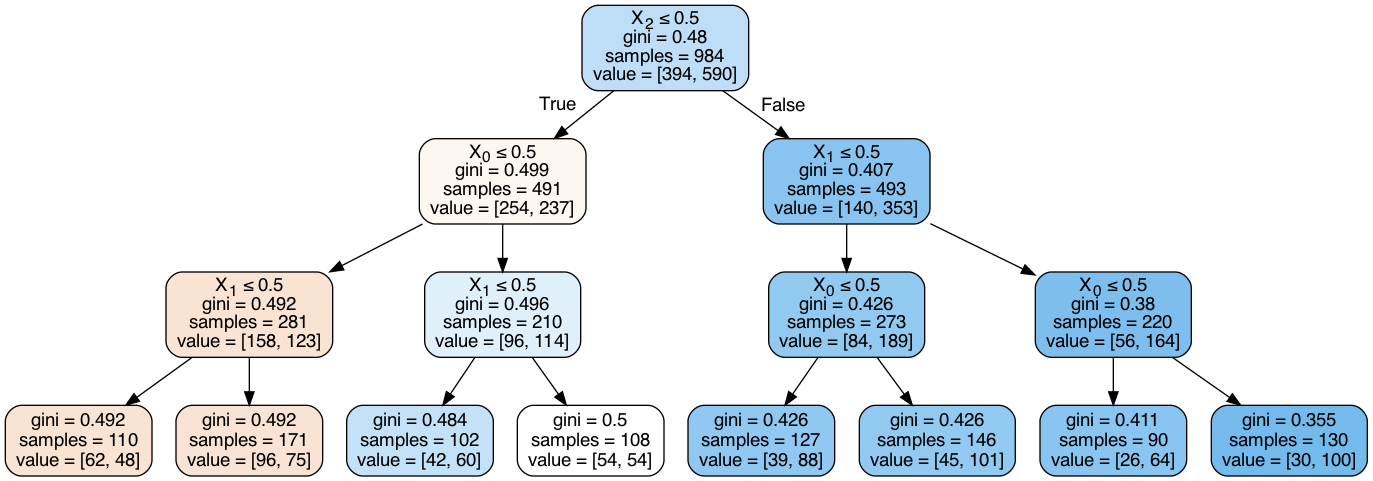

In [109]:
# Plot the decision tree 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [110]:
# Use the RF model to test it again
X_train, X_test, y_train, y_test = train_test_split(team_homehigher, y_true, random_state=60)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6280487804878049

In [59]:
last_match_winner = defaultdict(int)
df['HomeTeamWonLast'] = 0
for index, row in df.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    teams = tuple(sorted([home_team, visitor_team]))
    home_team_won_last = 1 if last_match_winner[teams] == row[
        'Home Team'] else 0
    df.at[index, 'HomeTeamWonLast'] = home_team_won_last
    winner = row['Home Team'] if row['Home_Win'] else row['Visitor Team']
    last_match_winner[teams] = winner

team_lastwinner = df[['HomeLastWin', 'VisitorLastWin', 'HomeTeamRanksHigher', 'HomeTeamWonLast']]

In [60]:
# Use the DT model to test it again
X_train, X_test, y_train, y_test = train_test_split(team_lastwinner, y_true, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt.score(X_test,y_test)

0.6067073170731707

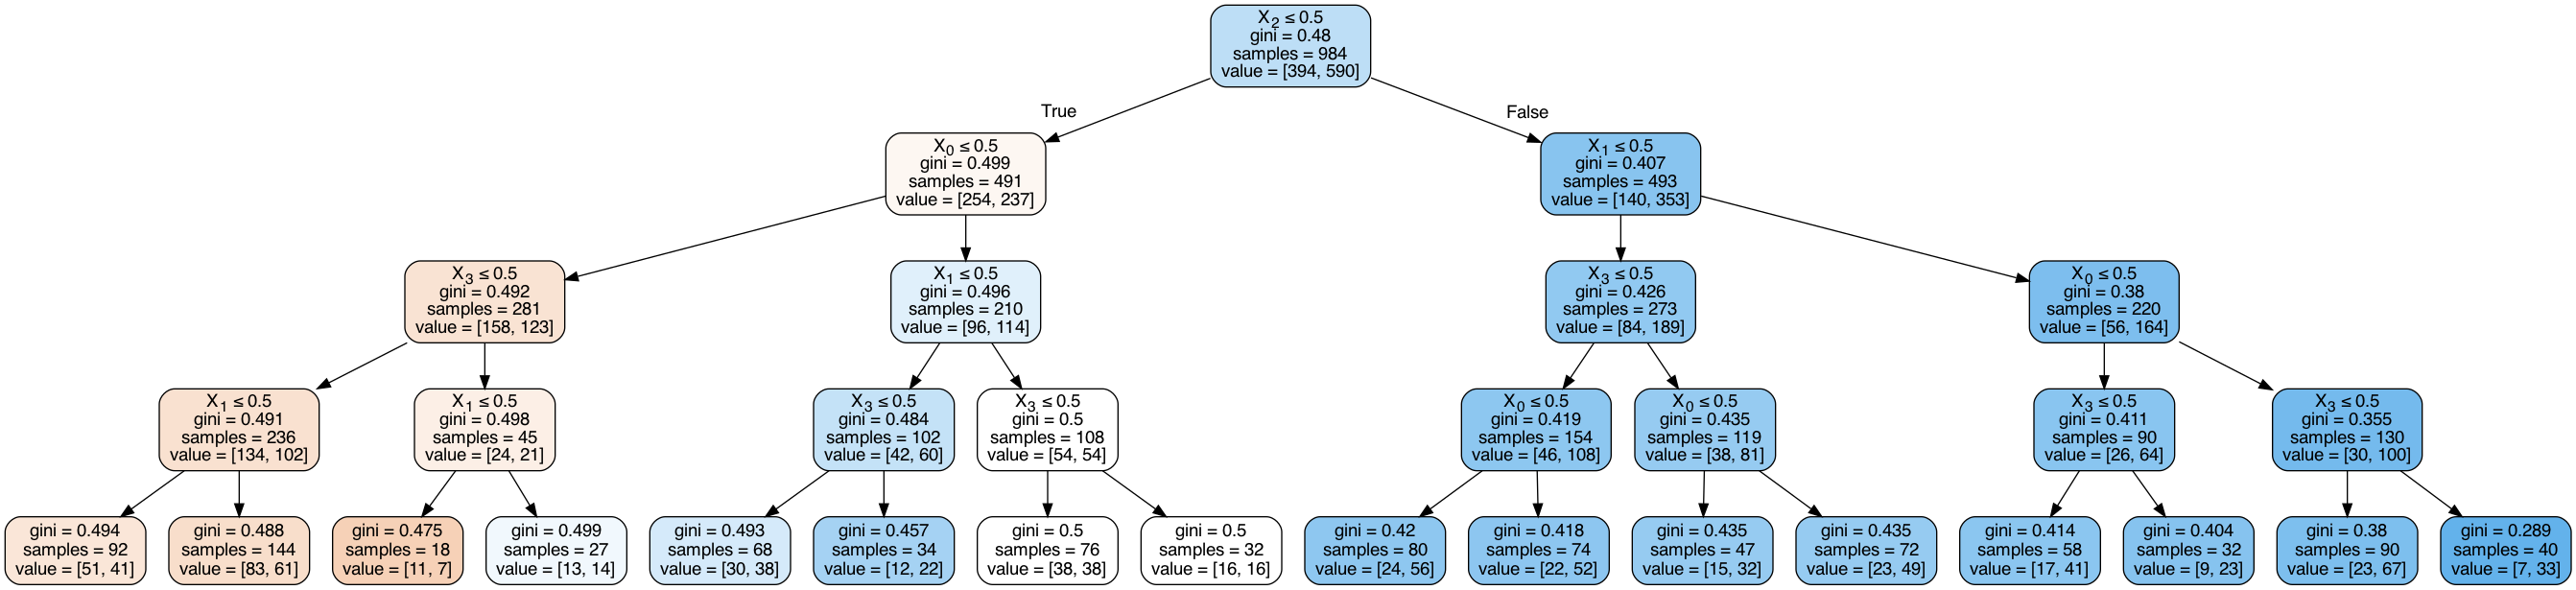

In [55]:
# Plot the decision tree 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [63]:
# Use the RF model to test it again
X_train, X_test, y_train, y_test = train_test_split(team_lastwinner, y_true, random_state=42)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5975609756097561

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

encoding = LabelEncoder()
onehot = OneHotEncoder()

encoding.fit(df['Home Team'].values)
home_teams = encoding.transform(df['Home Team'])
visitor_teams = encoding.transform(df['Visitor Team'])
teams = np.vstack([home_teams, visitor_teams]).T
teams = onehot.fit_transform(teams).todense()
all_teams = np.hstack([team_lastwinner, teams])


In [65]:
# Use the DT model to test it again
X_train, X_test, y_train, y_test = train_test_split(all_teams, y_true, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt.score(X_test,y_test)

0.6128048780487805

In [46]:
# Plot the decision tree 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [67]:
# Use the RF model to test it again
X_train, X_test, y_train, y_test = train_test_split(all_teams, y_true, random_state=62)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6951219512195121

In [ ]:
# This is the optimal one I've got so far. The RF model got the score is roughly %. 
# The score is not pretty good. 
# It shows that the accuracy score has improved by 10% though. 
# I believe that it would be slighly different if I added some other different features.